In [1]:
"""
 author:jjk
 datetime:2020/02/07
 coding:utf-8
 project name:test/pandas
 Program function: 

"""
import pandas as pd
import numpy as np
%matplotlib inline


In [12]:
df = pd.DataFrame({
    'pdata' : ['2019-12-01', '2019-12-02', '2019-12-04', '2019-12-05'],
    'pv' : [100,200,400,500],
    'uv' : [10, 20,40, 50]

})

df

,pdata,pv,uv
0,2019-12-01,100,10
1,2019-12-02,200,20
2,2019-12-04,400,40
3,2019-12-05,500,50


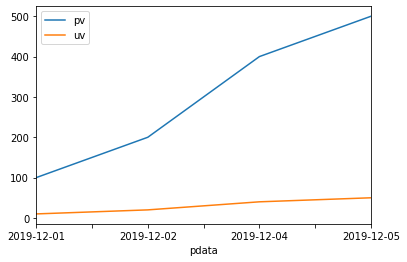

In [13]:
df.set_index('pdata').plot()

In [14]:
# 问题： 这里缺失了2019-12-03的数据，导致数据不全该如何补齐？

In [16]:
# 方法1：使用pandas.reindex方法
# 1、将df的索引变成日期索引
df_data = df.set_index('pdata')
df_data

,pv,uv
pdata,,
2019-12-01,100,10
2019-12-02,200,20
2019-12-04,400,40
2019-12-05,500,50


In [17]:
df_data.index

Index(['2019-12-01', '2019-12-02', '2019-12-04', '2019-12-05'], dtype='object', name='pdata')

In [18]:
# 将df的索引设置为日期索引
df_data = df_data.set_index(pd.to_datetime(df_data.index))
df_data

,pv,uv
pdata,,
2019-12-01,100,10
2019-12-02,200,20
2019-12-04,400,40
2019-12-05,500,50


In [19]:
df_data.index

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-04', '2019-12-05'], dtype='datetime64[ns]', name='pdata', freq=None)

In [20]:
# 2、使用pandas.reindex填充缺失的索引
# 生成完整的日期序列
pdates = pd.date_range(start='2019-12-01', end='2019-12-05')
pdates

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
               '2019-12-05'],
              dtype='datetime64[ns]', freq='D')

In [21]:
df_date_new = df_data.reindex(pdates,fill_value=0) # 重建索引，fill_value=0，是缺失索引对应的缺失值设置为0
df_date_new

,pv,uv
2019-12-01,100,10
2019-12-02,200,20
2019-12-03,0,0
2019-12-04,400,40
2019-12-05,500,50


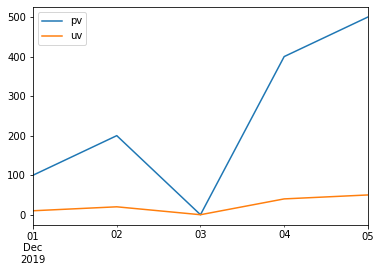

In [22]:
df_date_new.plot()

In [23]:
# 方法2：使用pandas.resample方法
# 1、先将索引变成日期索引
df

,pdata,pv,uv
0,2019-12-01,100,10
1,2019-12-02,200,20
2,2019-12-04,400,40
3,2019-12-05,500,50


In [24]:
df_new2 = df.set_index(pd.to_datetime(df['pdata'])).drop('pdata',axis=1) # 会保留pdata这个列，索引drop掉，axis=1是按列drop掉
df_new2

,pv,uv
pdata,,
2019-12-01,100,10
2019-12-02,200,20
2019-12-04,400,40
2019-12-05,500,50


In [25]:
df_new2.index

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-04', '2019-12-05'], dtype='datetime64[ns]', name='pdata', freq=None)

In [26]:
# 2、使用dataframe的resample的方法按照天重采样
# resample的含义：
# 改变数据的时间频率，比如把天气数据变成月份，或者把小时数据变成分钟级别
# resample的语法：
# (DataFrame or Series).resample(arguments).(aggregate function)
# resample的采样规则参数：https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [28]:
# 由于采样会让区间变成一个值，索引需要制定mean等采样值的设定方法
df_new2 = df_new2.resample('D').mean().fillna(0) # D按照天采样，然后平均值，
df_new2

,pv,uv
pdata,,
2019-12-01,100.0,10.0
2019-12-02,200.0,20.0
2019-12-03,0.0,0.0
2019-12-04,400.0,40.0
2019-12-05,500.0,50.0


In [31]:
df_new2.index

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
               '2019-12-05'],
              dtype='datetime64[ns]', name='pdata', freq='D')

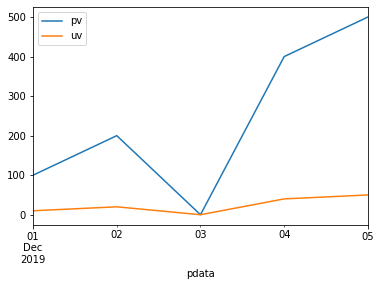

In [32]:
df_new2.plot()

In [30]:
# resample的使用方法
df_new2.resample('2D').mean() # 2D表示2天

,pv,uv
pdata,,
2019-12-01,150.0,15.0
2019-12-03,200.0,20.0
2019-12-05,500.0,50.0
